# Week 2 — Python Visualization & Exploratory Analysis

This analysis is part of a self-directed analytics curriculum focused on applying Python and visualization tools to real baseball tracking data.

Using Brandon Nimmo’s 2025 Statcast data, this notebook explores pitch-type tendencies, count-based performance, and spatial swing-and-miss patterns. While the structure reflects a learning exercise, the methods and interpretations mirror approaches used in applied baseball analytics.

As part of this assignment AI tools were used deliberately as a development tool to practice translating analytical and visualization concepts into clean, working code. All methodological choices, data vizualization concepts and interpretations are my own.

## 1. Import Packages


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
%matplotlib inline

## 2. Load Your Data
Load your Statcast dataset.


In [123]:
pd.set_option('display.max_columns', None)

df = pd.read_csv("nimmo_data.csv")
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,SI,2025-09-28,97.5,-1.18,5.93,"Cabrera, Edward",607043,665795,single,hit_into_play,NaN,NaN,NaN,NaN,4.0,Brandon Nimmo singles on a sharp line drive to...,R,L,R,MIA,NYM,X,7.0,line_drive,1,1,2025,-1.50,0.52,-0.41,2.40,NaN,NaN,NaN,1,4,Top,44.77,100.74,NaN,NaN,NaN,NaN,5.517606,-141.898769,-5.192165,-21.519368,31.192488,-24.212337,3.60,1.73,232.0,110.1,10.0,97.8,2262.0,6.4,776148,640459,676572,669364,681393,672640,691594,805300,681715,54.12,0.897,0.941,0.9,1.0,1.0,0.0,5.0,25,3,Sinker,0,0,0,0,0,0,0,0,Strategic,Standard,229.0,-0.030,0.425,NaN,NaN,1.253,-0.425,110.1,0,0,0.527154,0.472846,27,32,27,32,2,1,5.0,1.0,NaN,NaN,1.87,1.50,-1.50,29.3,NaN,NaN,NaN,NaN,NaN
1,CU,2025-09-28,85.9,-0.97,6.18,"Cabrera, Edward",607043,665795,NaN,ball,NaN,NaN,NaN,NaN,14.0,Ball,R,L,R,MIA,NYM,B,NaN,NaN,0,1,2025,0.87,-0.99,0.41,0.56,NaN,NaN,NaN,1,4,Top,NaN,NaN,NaN,NaN,NaN,NaN,1.509966,-125.008824,-4.989086,8.715449,27.999873,-41.575759,3.42,1.51,NaN,NaN,NaN,85.6,2756.0,6.3,776148,640459,676572,669364,681393,672640,691594,805300,681715,54.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,2,Curveball,0,0,0,0,0,0,0,0,Standard,Standard,36.0,0.000,0.029,NaN,NaN,NaN,-0.029,NaN,0,0,0.527154,0.472846,27,32,27,32,2,1,5.0,1.0,NaN,NaN,4.11,-0.87,0.87,40.9,NaN,NaN,NaN,NaN,NaN
2,SL,2025-09-28,88.5,-1.01,5.95,"Cabrera, Edward",607043,665795,NaN,called_strike,NaN,NaN,NaN,NaN,2.0,Called Strike,R,L,R,MIA,NYM,S,NaN,NaN,0,0,2025,0.15,0.69,0.19,3.06,NaN,NaN,NaN,1,4,Top,NaN,NaN,NaN,NaN,NaN,NaN,2.638115,-128.777122,-2.391419,1.094840,28.602052,-24.221211,3.49,1.75,NaN,NaN,NaN,88.6,2338.0,6.5,776148,640459,676572,669364,681393,672640,691594,805300,681715,54.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,1,Slider,0,0,0,0,0,0,0,0,Standard,Standard,110.0,0.000,-0.039,NaN,NaN,NaN,0.039,NaN,0,0,0.527154,0.472846,27,32,27,32,2,1,5.0,1.0,NaN,NaN,2.24,-0.15,0.15,33.3,NaN,NaN,NaN,NaN,NaN
3,FF,2025-09-28,97.5,-1.36,5.89,"Cabrera, Edward",607043,665795,field_out,hit_into_play,NaN,NaN,NaN,NaN,8.0,Brandon Nimmo flies out to left fielder Javier...,R,L,R,MIA,NYM,X,7.0,fly_ball,0,0,2025,-0.86,1.22,-0.14,2.23,NaN,NaN,NaN,0,2,Top,74.96,64.11,NaN,NaN,NaN,NaN,5.262708,-141.701592,-7.100501,-12.785768,33.395431,-14.305695,3.60,1.73,357.0,98.7,23.0,97.3,2374.0,6.3,776148,640459,676572,669364,681393,672640,691594,805300,681715,54.18,0.367,0.501,0.0,1.0,0.0,0.0,5.0,7,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Standard,Standard,225.0,0.023,-0.259,NaN,NaN,0.841,0.259,98.7,0,0,0.500000,0.500000,27,32,2

## 3. Explore Columns
Inspect the columns in your dataset.

**Hint:** Use `df.columns` or loop through them if the list is long.

In [10]:
list(df.columns)

['pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'fielder_2',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'release_pos_y',
 'estimated_ba_using_speedangle',
 'estimated_woba_using_speedangle',
 'w

## 4. Assignment 1 — Pitch Type Summary Table
Compute swing %, whiff %, and putaway % by pitch type.

**Hints:**
- Identify swing and whiff events in your dataset.
- Use `groupby("pitch_type")`.
- You may find it helpful to create intermediate tables and merge them.
- Consider using `.agg()` for compact summaries.

In [4]:
pitch_name_map = {
    'FF': 'Four-Seam Fastball',
    'SI': 'Sinker',
    'FC': 'Cutter',
    'SL': 'Slider',
    'CU': 'Curveball',
    'KC': 'Knuckle Curve',
    'CH': 'Changeup',
    'FS': 'Splitter',
    'SV': 'Slurve',
    'ST': 'Sweeper',
    'EP': 'Eephus',
    'FA': 'Fastball (General)'
}

In [141]:
# Start by determining what is a swing & whiff. We'll come back to putaway pitches later.

df['description'].unique()

swing = ['hit_into_play', 'foul', 'swinging_strike', 'foul_tip', 'foul_bunt', 'swinging_strike_blocked']
whiff = ['swinging_strike', 'swinging_strike_blocked']


# Create a separate column for each event with swing and whiff

df['swing'] = df['description'].isin(swing)
df['whiff'] = df['description'].isin(whiff)

# Group by pitch and calculate swing %

swing_pcts = df.groupby('pitch_type')['swing'].agg(['count', lambda x: x.mean() * 100]).round(2)
swing_pcts.columns = ['Pitches Seen', 'Swing %']


#Filter to swings and calculate whiff %

swings = df[df['swing']]

whiff_pcts = swings.groupby('pitch_type')['whiff'].agg(['count', lambda x: x.mean() * 100]).round(2)
whiff_pcts.columns = ['Swings', 'Whiff %']

# Filter down to 2 strike counts 

two_strikes = df[df['strikes'] == 2].copy()

# add putaway variable

two_strikes['putaway'] = two_strikes['events'] == 'strikeout'

# Group by pitch and find putaway %

putaway_pcts = two_strikes.groupby('pitch_type')['putaway'].agg(['count', lambda x: x.mean() * 100]).round(2)
putaway_pcts.columns = ['2 Strike Counts', 'Putaway %']


temp_pcts = pd.merge(swing_pcts, whiff_pcts, on='pitch_type', how = 'outer')
swing_whiff_pa_pcts = pd.merge(temp_pcts, putaway_pcts, on = 'pitch_type', how = 'outer').sort_values(by='Pitches Seen', ascending=False)
swing_whiff_pa_pcts.index.name = 'Pitch'

swing_whiff_pa_pct



,Pitches Seen,Swing %,Swings,Whiff %,2 Strike Counts,Putaway %
Pitch,,,,,,
FF,935,47.81,447,20.13,302.0,16.23
SL,376,55.85,210,31.43,152.0,22.37
SI,367,46.05,169,11.24,87.0,16.09
CU,256,36.33,93,24.73,88.0,15.91
FC,196,50.00,98,17.35,38.0,15.79
CH,162,41.36,67,25.37,52.0,13.46
ST,145,48.97,71,22.54,45.0,22.22
FS,86,48.84,42,30.95,29.0,10.34
KC,53,37.74,20,25.00,22.0,18.18


### Create a visualization using matplotlib

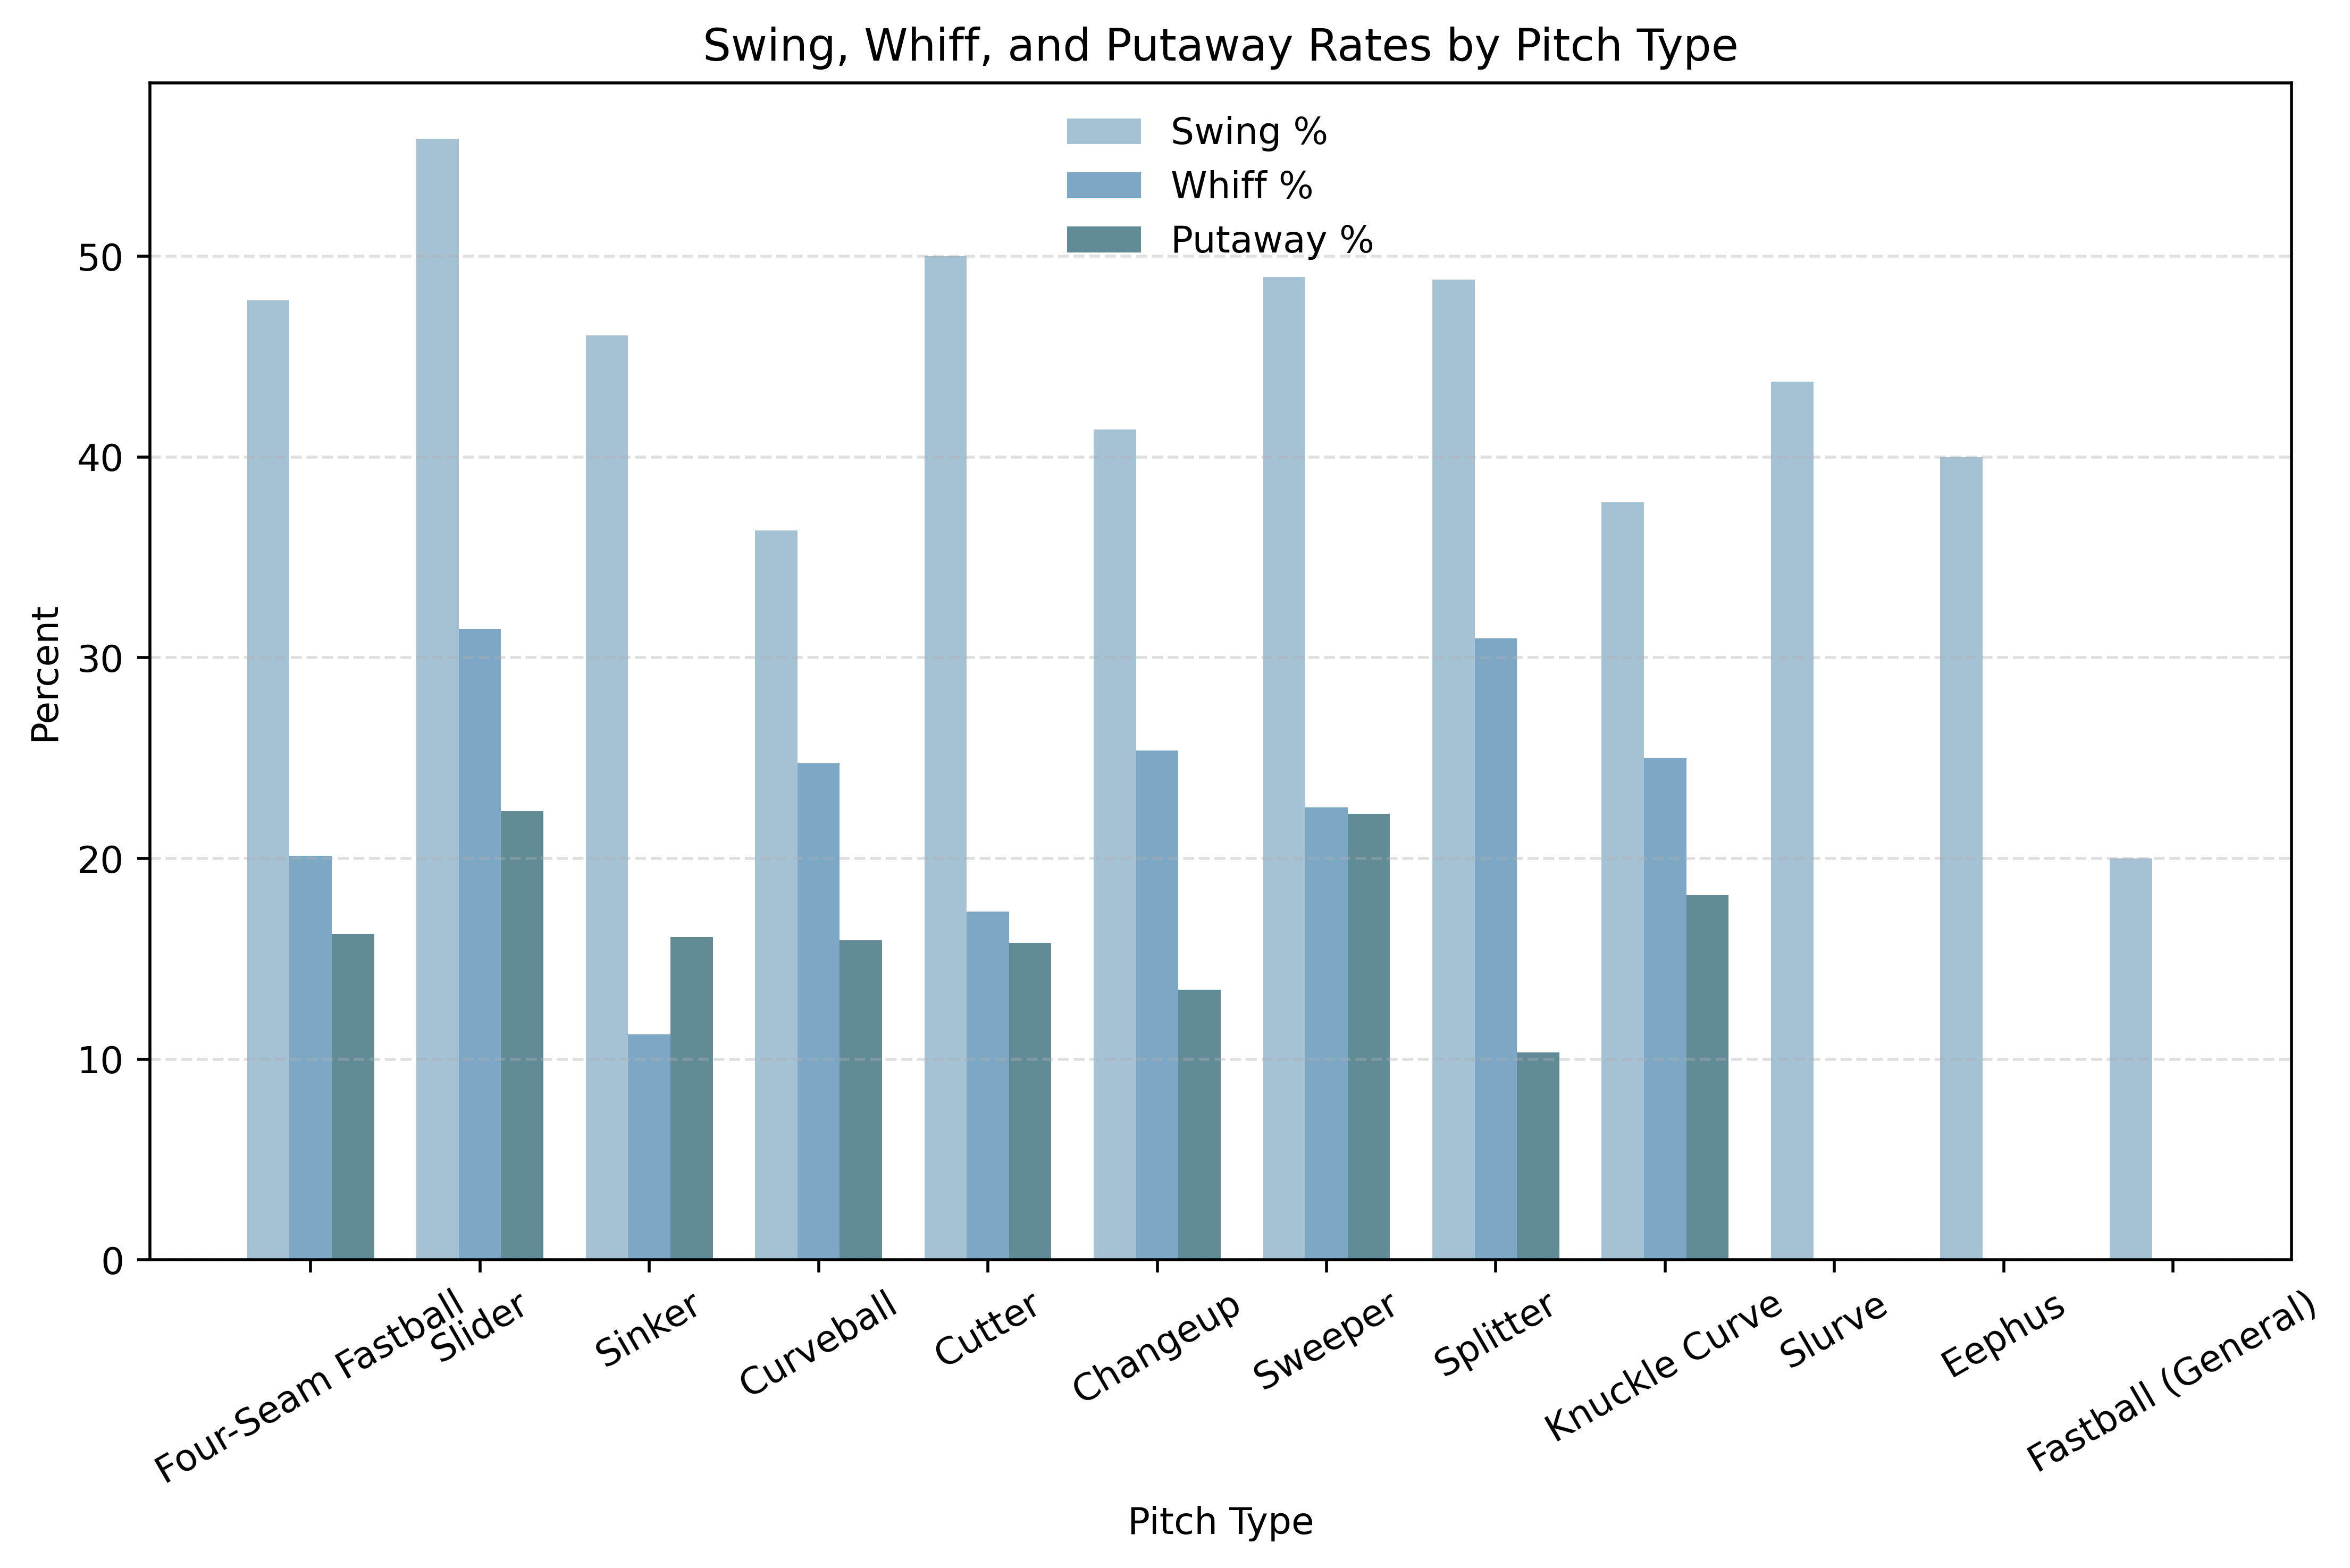

In [192]:
# Create a table with just the values you want to graph
pcts_only = swing_whiff_pa_pcts.drop(['Pitches Seen', 'Swings', '2 Strike Counts'], axis=1)

# Color palette (single, cohesive palette)
colors = {
    'Swing %':   '#9bbcd1',
    'Whiff %':   '#6f9fbf',
    'Putaway %': '#4f7f8c'
}

# Prepare data
pitch_labels = pcts_only.index
metrics = pcts_only.columns
x = np.arange(len(pitch_labels))
width = 0.25

# Create figure
fig, ax = plt.subplots(figsize=(9, 6), dpi=500)

# Plot grouped bars
for i, metric in enumerate(metrics):
    ax.bar(
        x + i * width,
        pcts_only[metric],
        width,
        label=metric,
        color=colors[metric],
        alpha=0.9
    )


# Use the pitch dictionary and switch out abreviations
pitch_labels = [
    pitch_name_map.get(pitch, pitch) 
    for pitch in pcts_only.index
]
    
# Center x-axis labels
ax.set_xticks(x + width)
ax.set_xticklabels(pitch_labels, rotation=30)

# Labels and title
ax.set_title('Swing, Whiff, and Putaway Rates by Pitch Type')
ax.set_ylabel('Percent')
ax.set_xlabel('Pitch Type')

# Legen
ax.legend(frameon=False)

# Grid (subtle)
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

### Create a visualization using plotly

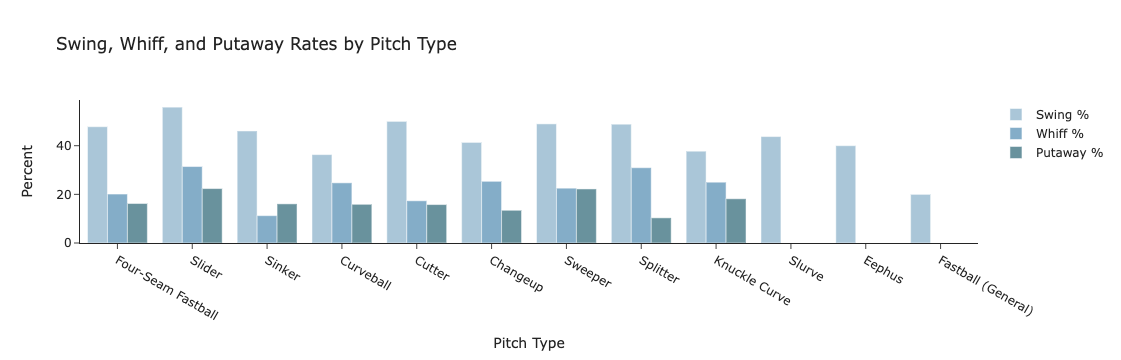

In [207]:
import plotly.graph_objects as go

metrics = ['Swing %', 'Whiff %', 'Putaway %']
colors = {
    'Swing %': '#9bbcd1',
    'Whiff %': '#6f9fbf',
    'Putaway %': '#4f7f8c'
}

fig = go.Figure()

for metric in metrics:
    fig.add_trace(
        go.Bar(
            x = [
                pitch_name_map.get(pitch, pitch) 
                for pitch in swing_whiff_pa_pcts.index
            ],
            y=swing_whiff_pa_pcts[metric],
            name=metric,
            marker_color=colors[metric],
            opacity=0.85
        )
    )

fig.update_layout(
    barmode='group',
    title='Swing, Whiff, and Putaway Rates by Pitch Type',
    xaxis_title='Pitch Type',
    yaxis_title='Percent',
    hovermode='x unified',
    template='simple_white'
)


fig.update_xaxes(
    showspikes=True,
    spikecolor='rgba(0,0,0,0.12)',
    spikethickness=1,
    spikedash='dot'
)

fig.update_traces(
    hoverlabel=dict(
        bgcolor='rgba(255,255,255,0.95)',
        bordercolor='#6f9fbf'
    )
)


fig.show()

## 5. Assignment 2 — Count-Based Performance
Group by count (0-0, 1-0, etc.) and compute xBA, mean EV, mean LA, and hard-hit %.


In [200]:
HARD_HIT = 95
COUNT_ORDER = [
    '0-0',
    '1-0', '0-1',
    '2-0', '1-1', '0-2',
    '3-0', '2-1', '1-2',
    '3-1', '2-2',
    '3-2'
]

ev_col = 'launch_speed'
la_col = 'launch_angle'
xba_col = 'estimated_ba_using_speedangle'

batted = df.dropna(subset=[ev_col, la_col]).copy()


count_summary = batted.groupby(['balls', 'strikes']).agg(
    
     mean_la=(la_col, 'mean'),
     mean_ev=(ev_col, 'mean'),
     mean_xba=(xba_col, 'mean'),
     hard_hit_pct=(ev_col, lambda x: (x >= HARD_HIT).mean() * 100),
     batted_balls=(ev_col, 'size')
    
).round(2)


# Convert (balls, strikes) MultiIndex -> "count" index
count_summary = count_summary.reset_index()
count_summary['count'] = count_summary['balls'].astype(str) + '-' + count_summary['strikes'].astype(str)
count_summary = count_summary.set_index('count')


# Order conts
count_summary = count_summary.reindex([c for c in COUNT_ORDER if c in count_summary.index])

count_summary

,balls,strikes,mean_la,mean_ev,mean_xba,hard_hit_pct,batted_balls
count,,,,,,,
0-0,0,0,20.32,85.28,0.31,31.69,142
1-0,1,0,18.62,85.53,0.38,27.87,61
0-1,0,1,18.64,81.84,0.31,21.88,96
2-0,2,0,21.71,92.66,0.35,54.17,24
1-1,1,1,18.04,86.53,0.38,32.26,93
0-2,0,2,19.78,80.98,0.29,18.84,69
3-0,3,0,73.00,78.00,NaN,0.00,1
2-1,2,1,23.32,88.30,0.42,41.18,68
1-2,1,2,13.57,84.43,0.33,33.91,115


## 6. Assignment 3 — Heatmaps
### A. Whiff % by Pitch Location
Create bins for horizontal and vertical pitch location.

**Hints:**
- Use `pd.cut()` to bin continuous values.
- Group by the two binned columns.
- Pivot the grouped results.
- Use `sns.heatmap()` to visualize.

### Initial Exploration: 7×7 evenly spaced heatmap

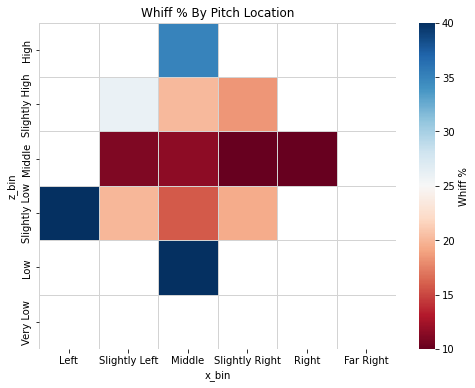

In [141]:
# Heatmap of whiff % here

N_BINS = 7

# 7 bins across the plate (catcher’s view: negative = left, positive = right)
x_labels = [
    "Far Left",
    "Left",
    "Slightly Left",
    "Middle",
    "Slightly Right",
    "Right",
    "Far Right"
]

# 7 bins vertically (bottom to top)
z_labels = [
    "Very Low",
    "Low",
    "Slightly Low",
    "Middle",
    "Slightly High",
    "High",
    "Very High"
]

swing = ['hit_into_play', 'foul', 'swinging_strike', 'foul_tip', 'foul_bunt', 'swinging_strike_blocked']
whiff = ['swinging_strike', 'swinging_strike_blocked']


# Create a separate column for each event with swing and whiff and filter to swings only

df['swing'] = df['description'].isin(swing)
df['whiff'] = df['description'].isin(whiff)
swings_df = df[df['swing']].copy()


# write edges
x_edges = np.linspace(-2, 2, 8)  # 7 bins → 8 edges
z_edges = np.linspace(0, 5, 8)


#Cut using above edges
swings_df['x_bin'] = pd.cut(swings_df['plate_x'], bins=x_edges, labels = x_labels, include_lowest=True)
swings_df['z_bin'] = pd.cut(swings_df['plate_z'], bins=z_edges, labels = z_labels, include_lowest=True)


# Force a consistent, meaningful order (important for heatmaps/pivots)
swings_df['x_bin'] = swings_df['x_bin'].astype(
    pd.CategoricalDtype(categories=x_labels, ordered=True)
)

swings_df['z_bin'] = swings_df['z_bin'].astype(
    pd.CategoricalDtype(categories=z_labels, ordered=True)
)


swings_df[['plate_x', 'x_bin']].head()
swings_df[['plate_z', 'z_bin']].head()


swings_df.groupby(['x_bin', 'z_bin']).agg(
    
    whiff_rate=('whiff', 'mean'),
    swings_taken= ('swing', 'size')
)


whiff_matrix = swings_df.pivot_table(
    values='whiff',
    index='z_bin',
    columns='x_bin',
    aggfunc='mean'
)

count_matrix = swings_df.pivot_table(
    values='swing',
    index='z_bin',
    columns='x_bin',
    aggfunc='size'
)

MIN_SWINGS = 20 #threshold to gray out squares without a substantial number of swings

plt.figure(figsize=(8, 6))

whiff_masked = whiff_matrix.where(count_matrix >= MIN_SWINGS)

sns.heatmap(
    whiff_masked * 100,
    cmap="RdBu",          # Blue = high, Red = low
    vmin=10,
    vmax=40,
    center=25,
    cbar_kws={'label': 'Whiff %'},
    linewidths=0.5,
    linecolor='lightgray'
)

plt.title('Whiff % By Pitch Location')
plt.gca().invert_yaxis()   # Ensures low values appear low

plt.show()

### Final visualization (zone-aware bins)

I used AI to help me write code to bin around the strike zone for visual clarity rather than randomly binning in space.

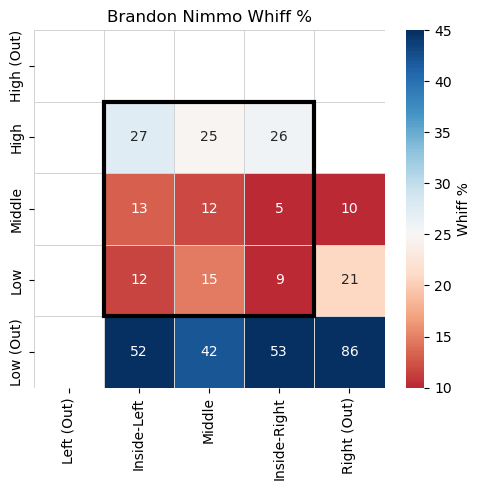

In [202]:
# --- Inputs / assumptions ---
# swings_df already exists and includes only swings
# swings_df has: plate_x, plate_z, whiff (boolean), and ideally sz_bot/sz_top

MIN_SWINGS = 20  # mask bins with fewer swings than this
X_OUT_MIN, X_OUT_MAX = -2.0, 2.0
Z_OUT_MIN, Z_OUT_MAX = 0.0, 5.0

# 1) Strike-zone horizontal edges (approx Statcast zone width: -0.83 to +0.83)
# Split into 3 equal columns inside the zone
x_zone_left, x_zone_right = -0.83, 0.83
x_inside_edges = np.linspace(x_zone_left, x_zone_right, 4)  # 3 bins -> 4 edges

# Add one "outside" bin on each side
x_edges = np.array([X_OUT_MIN, x_zone_left, x_inside_edges[1], x_inside_edges[2], x_zone_right, X_OUT_MAX])

x_labels = ["Left (Out)", "Inside-Left", "Middle", "Inside-Right", "Right (Out)"]

# 2) Strike-zone vertical edges (use batter-specific zone if available)
if {'sz_bot', 'sz_top'}.issubset(swings_df.columns):
    z_bot = swings_df['sz_bot'].median()
    z_top = swings_df['sz_top'].median()
else:
    # Fallback: reasonable generic zone (approx)
    z_bot, z_top = 1.5, 3.5

# Split into 3 equal rows inside the zone
z_inside_edges = np.linspace(z_bot, z_top, 4)  # 3 bins -> 4 edges

# Add one "outside" bin below and above
z_edges = np.array([Z_OUT_MIN, z_bot, z_inside_edges[1], z_inside_edges[2], z_top, Z_OUT_MAX])

z_labels = ["Low (Out)", "Low", "Middle", "High", "High (Out)"]

# 3) Bin the locations
swings_df = swings_df.copy()
swings_df['x_bin'] = pd.cut(swings_df['plate_x'], bins=x_edges, labels=x_labels, include_lowest=True)
swings_df['z_bin'] = pd.cut(swings_df['plate_z'], bins=z_edges, labels=z_labels, include_lowest=True)

# Ensure stable ordering
swings_df['x_bin'] = swings_df['x_bin'].astype(pd.CategoricalDtype(categories=x_labels, ordered=True))
swings_df['z_bin'] = swings_df['z_bin'].astype(pd.CategoricalDtype(categories=z_labels, ordered=True))

# 4) Build matrices: whiff rate + swing counts
whiff_mat = swings_df.pivot_table(values='whiff', index='z_bin', columns='x_bin', aggfunc='mean')
count_mat = swings_df.pivot_table(values='whiff', index='z_bin', columns='x_bin', aggfunc='size')

# Mask low-sample bins
whiff_mat = whiff_mat.where(count_mat >= MIN_SWINGS) * 100  # convert to %

# 5) Plot heatmap

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

sns.heatmap(
    whiff_mat,
    ax=ax,
    cmap="RdBu",          # Blue = high whiff, Red = low whiff (Statcast-like)
    vmin=10, vmax=45,     # tune these to your data range
    center=25,
    linewidths=0.5,
    linecolor="lightgray",
    cbar_kws={"label": "Whiff %"},
    annot=True,
    fmt=".0f"
)

ax.set_title("Brandon Nimmo Whiff %")
ax.set_xlabel("")
ax.set_ylabel("")

# Put "Low" at bottom (visually more intuitive)
ax.invert_yaxis()

# 6) Add thick black border around the 3×3 strike-zone cells
# In our 5×5 grid:
# - x columns: 0 out, 1-3 in-zone, 4 out
# - z rows:    0 out, 1-3 in-zone, 4 out
zone_rect = Rectangle(
    (1, 1),      # (x0, y0) in heatmap cell coordinates
    3, 3,        # width, height in number of cells
    fill=False,
    edgecolor="black",
    linewidth=3
)
ax.add_patch(zone_rect)

plt.tight_layout()

plt.show()


### B. Hard-Hit % by Pitch Type
You may use a bar chart or heatmap.



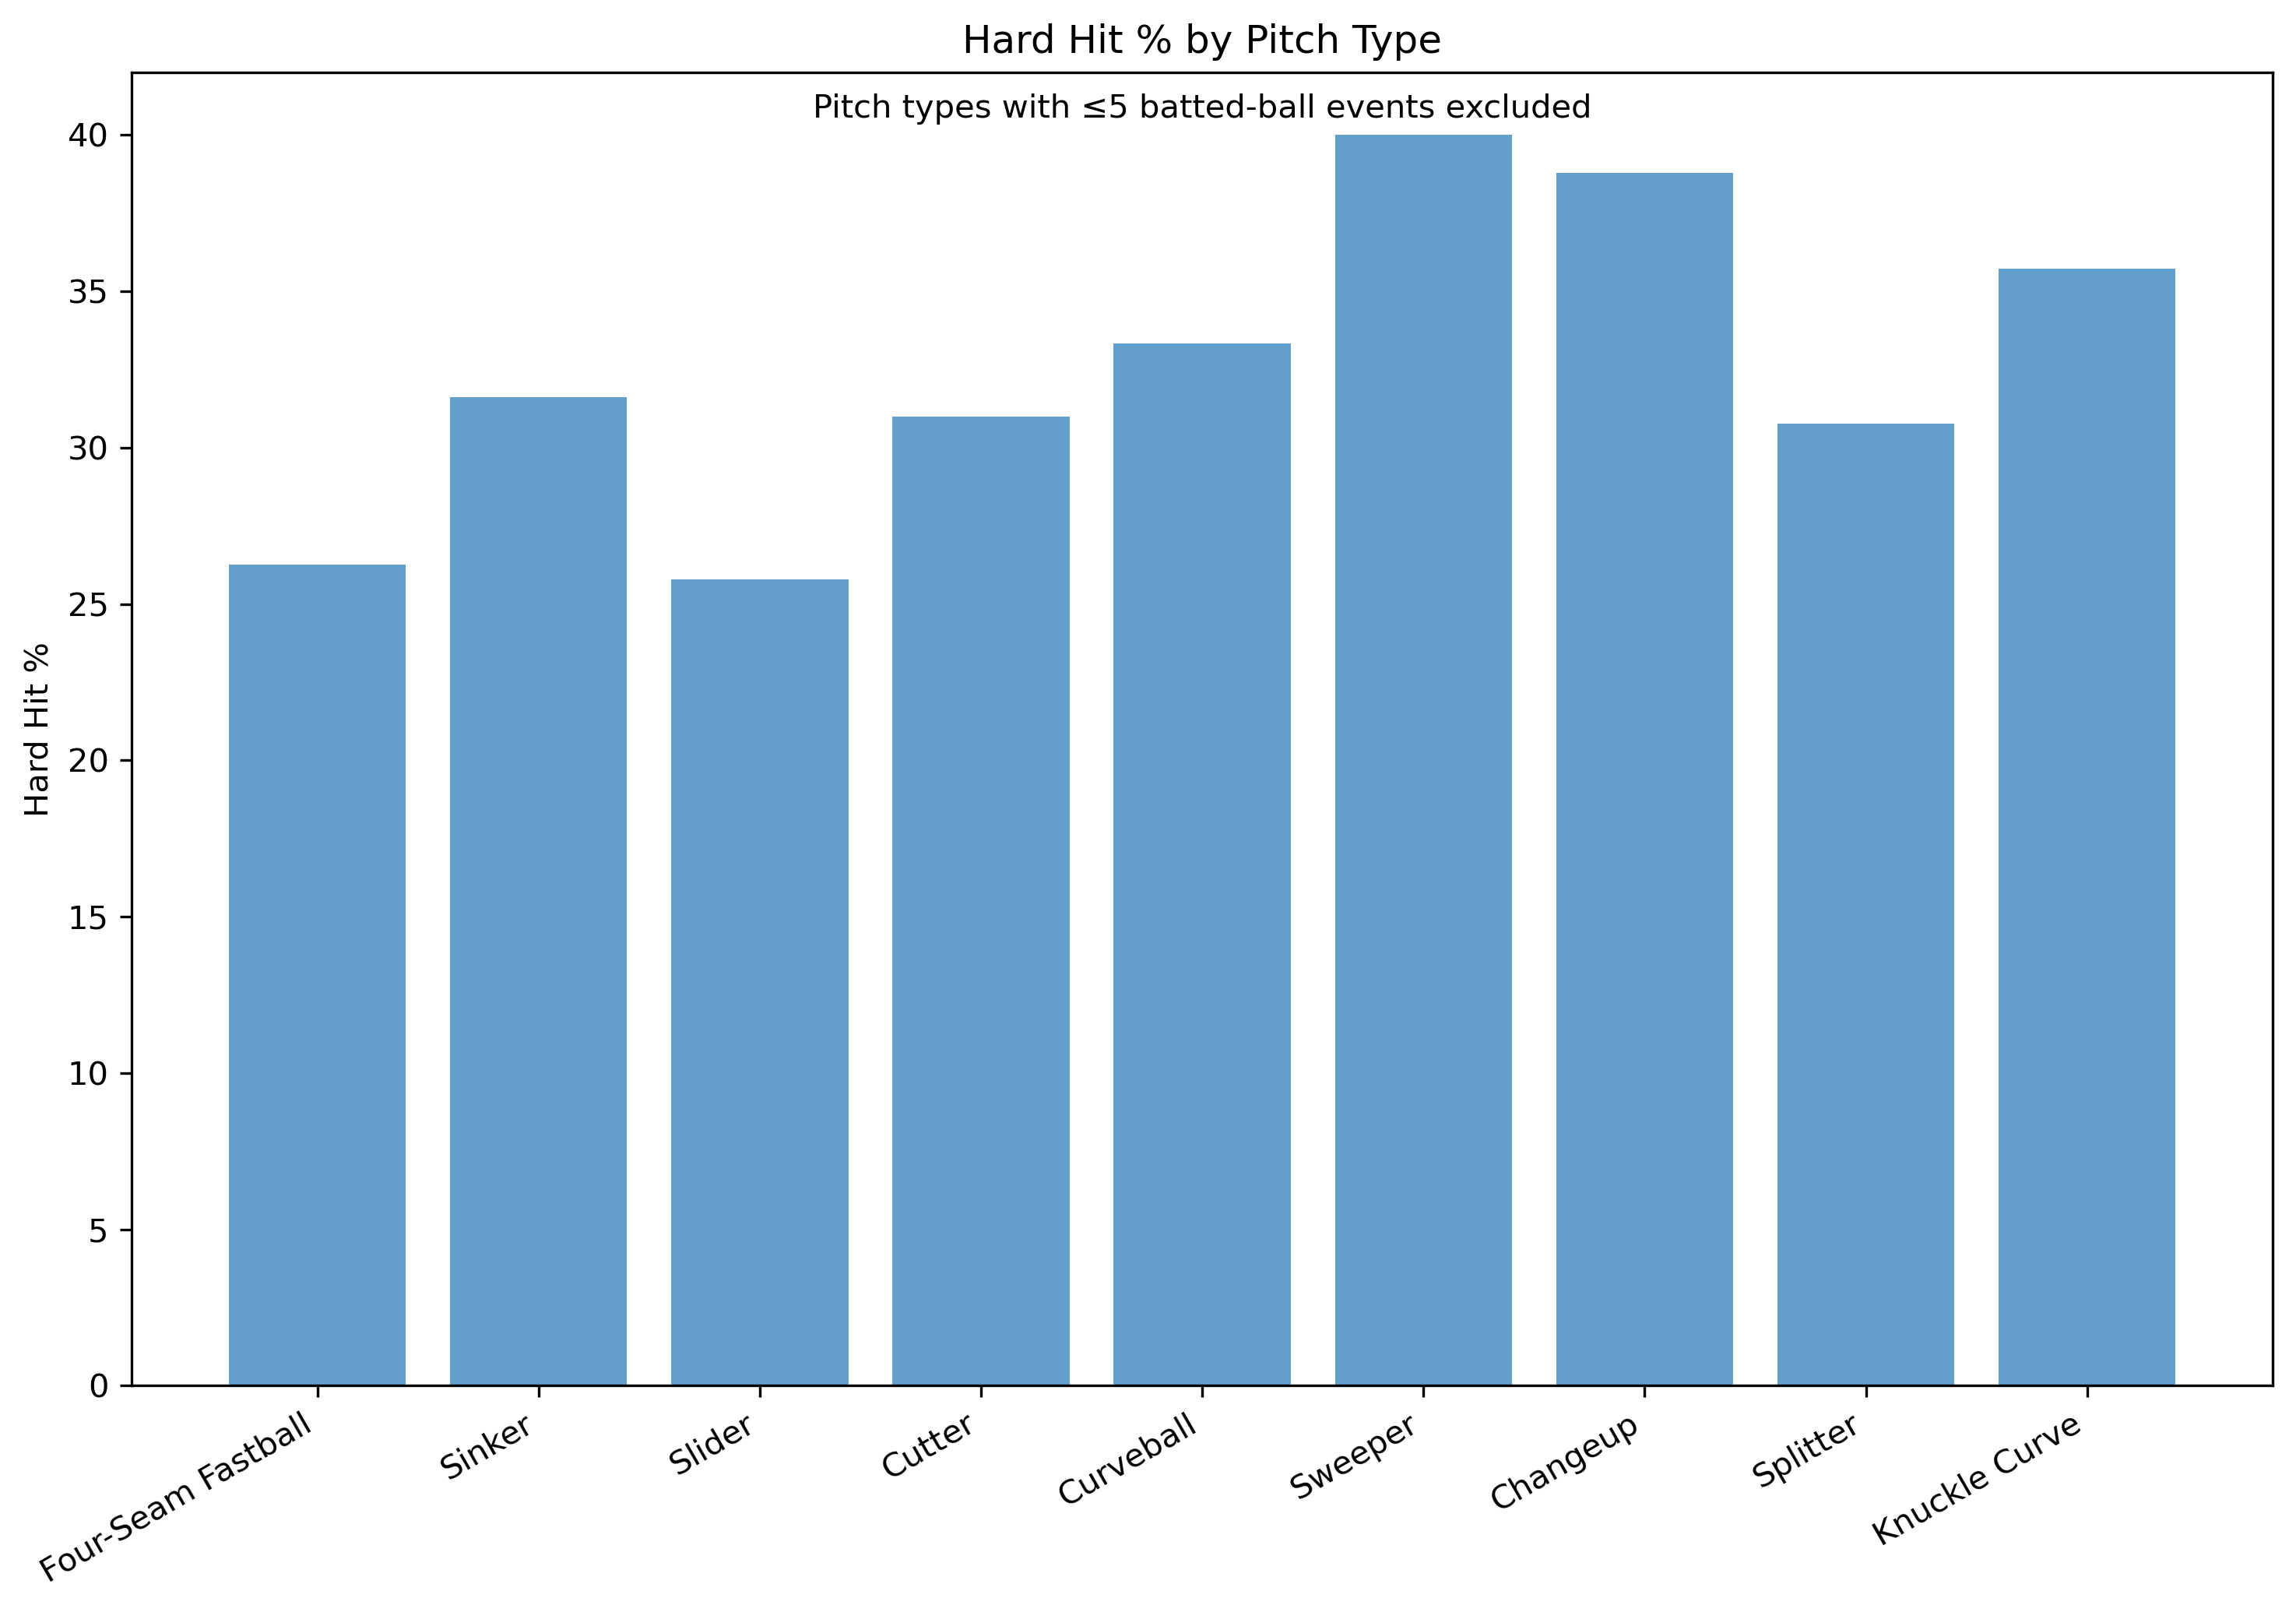

In [199]:
HARD_HIT = 95
MIN_SWINGS = 6 # eliminates 5 or fewer
ev_col = "launch_speed"
la_col = "launch_angle"


batted = df.dropna(subset=[ev_col, la_col]).copy()
batted['hard_hit'] = batted[ev_col] >= HARD_HIT

summary = (
    batted
    .groupby('pitch_type')
    .agg(
        hard_hit_pct=('hard_hit', 'mean'),
        total_batted=('hard_hit', 'size')
    )
    .sort_values(by='total_batted', ascending=False)
)

# convert to percent for plotting
summary['hard_hit_pct'] = summary['hard_hit_pct'] * 100

# remove pitches that don't mean min swings threshold
summary = summary[summary['total_batted'] >= MIN_SWINGS].copy()


# Data for the chart
pitch_labels = [pitch_name_map.get(p, p) for p in summary.index] # use pitch dictionary from earlier assignment
y_position = np.arange(len(pitch_labels)) # arranges the position of the bars on the x-axis
value = summary['hard_hit_pct']

# Create the bar chart
plt.figure(figsize=(10, 7), dpi = 300)
plt.bar(y_position, value, alpha=0.7)



plt.xticks(y_position, pitch_labels, rotation=30, ha='right')
plt.ylabel('Hard Hit %')
plt.title('Hard Hit % by Pitch Type')
plt.tight_layout()

plt.text(0.5, 0.96, "Pitch types with ≤5 batted-ball events excluded",
         ha="center", va="bottom", transform=plt.gca().transAxes, fontsize=10)
plt.show()


## 7. Summary & Interpretation
Write a short summary describing what you found.

**Summary:**
- Sliders generate Nimmo’s highest whiff rates, consistent with league-wide trends.
- Hard-hit rates spike in hitter-friendly counts, suggesting intentional damage-seeking when ahead.
- Whiffs are spatially concentrated in classic chase and elevated locations rather than the heart of the zone.

**Pitch-Type Tendencies:**
For Brandon Nimmo, sliders generate the highest whiff rate. This is not unusual, as sliders are commonly used by pitchers as a primary swing-and-miss offering. The next two pitches on which Nimmo whiffs most frequently are curveballs and changeups, reinforcing the broader pattern that his highest whiff rates come against offspeed and breaking pitches rather than fastballs.

**Count-Based Contact Quality:**
Nimmo’s hard-hit rate is highest in hitter-friendly counts. In particular, he produces a hard-hit rate of approximately 54% in 2–0 counts and 41% in 2–1 counts. This suggests that when ahead in the count, Nimmo is more likely to look for a pitch he can drive and do damage on. Conversely, in pitcher-friendly counts, his hard-hit rate drops, consistent with a more contact-oriented approach. This pattern reflects a disciplined approach at the plate and an ability to adjust intent based on count leverage.

**Spatial Whiff Patterns:**
Spatially, Nimmo rarely whiffs on pitches located in the middle and lower portions of the strike zone, while his whiff rate increases on pitches elevated above the zone. While elevated pitches are often considered mistakes, this pattern suggests that the misses may be driven by elevated fastballs rather than poorly executed pitches overall. Additionally, Nimmo demonstrates strong contact ability on pitches located on the inner half of the plate. As expected, he also shows elevated whiff rates on pitches below the zone, consistent with the typical behavior of breaking balls designed to induce chase and swing-and-miss.

**Conclusion:**
The majority of this analysis explores batted-ball and swing outcomes and does not capture pitch selection or take decisions. That said, the results suggest that Nimmo profiles as a mature hitter with a disciplined approach and a clear understanding of count leverage.